<a href="https://colab.research.google.com/github/Chaitanyate/Deep_learning/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url

In [3]:
dataset_url="http://files.fast.ai/data/cifar10.tgz"
download_url(dataset_url,'.')

In [4]:
with tarfile.open('./cifar10.tgz','r:gz') as tar:
  tar.extractall(path='./data')

In [5]:
data_dir='./data/cifar10'
print(os.listdir(data_dir))
classes=os.listdir(data_dir +"/train")
print(len(classes[8]))

['labels.txt', 'train', 'test']
3


In [6]:
airplanes_files=os.listdir(data_dir +"/train/airplane")
print(len(airplanes_files))
print(airplanes_files[:5])

5000
['42151_airplane.png', '29748_airplane.png', '12375_airplane.png', '32479_airplane.png', '23667_airplane.png']


In [7]:
airplanes_files=os.listdir(data_dir +"/test/ship")
print(len(airplanes_files))
print(airplanes_files[:5])

1000
['3763_ship.png', '5688_ship.png', '7307_ship.png', '6049_ship.png', '4403_ship.png']


In [8]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [9]:
dataset=ImageFolder(data_dir + '/train',transform=ToTensor())


In [10]:
img,label=dataset[5]
print(img.shape,label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7020, 0.7020, 0.7059,  ..., 0.7490, 0.7412, 0.7412],
         [0.7020, 0.7020, 0.7059,  ..., 0.7647, 0.7608, 0.7529],
         [0.7020, 0.7020, 0.7059,  ..., 0.7843, 0.7804, 0.7686],
         ...,
         [0.8510, 0.8431, 0.8510,  ..., 0.8392, 0.8314, 0.8275],
         [0.8510, 0.8510, 0.8588,  ..., 0.8510, 0.8471, 0.8431],
         [0.8627, 0.8588, 0.8667,  ..., 0.8549, 0.8549, 0.8549]],

        [[0.8118, 0.8078, 0.8118,  ..., 0.8157, 0.8118, 0.8118],
         [0.8078, 0.8078, 0.8118,  ..., 0.8275, 0.8196, 0.8157],
         [0.8118, 0.8078, 0.8118,  ..., 0.8431, 0.8431, 0.8275],
         ...,
         [0.8510, 0.8431, 0.8510,  ..., 0.8471, 0.8431, 0.8353],
         [0.8471, 0.8471, 0.8549,  ..., 0.8549, 0.8510, 0.8471],
         [0.8510, 0.8471, 0.8549,  ..., 0.8510, 0.8510, 0.8510]],

        [[0.9176, 0.9137, 0.9176,  ..., 0.9294, 0.9255, 0.9255],
         [0.9137, 0.9137, 0.9176,  ..., 0.9373, 0.9294, 0.9255],
         [0.9176, 0.9137, 0.9176,  ..., 0.9490, 0.9451, 0.

In [22]:
import matplotlib.pyplot as plt

def show_example(img,label):
  print("label:",dataset.classes[label],'('+str(label)+')')
  plt.imshow(img.permute(1,2,0))


label: airplane (0)


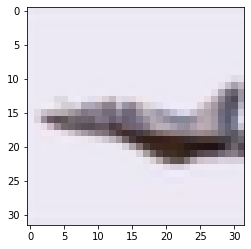

In [23]:
show_example(*dataset[2299])

In [13]:
import numpy as np
def split_indices(n,val_pet,seed):
  n_val=int(val_pet*n)
  np.random.seed(seed)
  idxs=np.random.permutation(n)
  return idxs[n_val:],idxs[:n_val]
  

In [14]:
val_pet=0.2
rand_seed=42
train_indices,val_indices=split_indices(len(dataset),val_pet,rand_seed)
print(len(train_indices),len(val_indices))
print(val_indices[:10])

40000 10000
[33553  9427   199 12447 39489 42724 10822 49498  4144 36958]


In [25]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader
batch_size=100

In [26]:
train_sample=SubsetRandomSampler(train_indices)
train_dl=DataLoader(dataset,batch_size,sampler=train_sample)
val_sample=SubsetRandomSampler(val_indices)
val_dl=DataLoader(dataset,batch_size,sampler=val_sample)

In [73]:
from torchvision.utils import make_grid
def show_batch(dl):
  for img,label in dl:
    fig,ax=plt.subplots(figsize=(10,10))
    ax.set_xticks([]) 
    ax.set_yticks([])
    ax.imshow(make_grid(img,10).permute(1,2,0))
    break


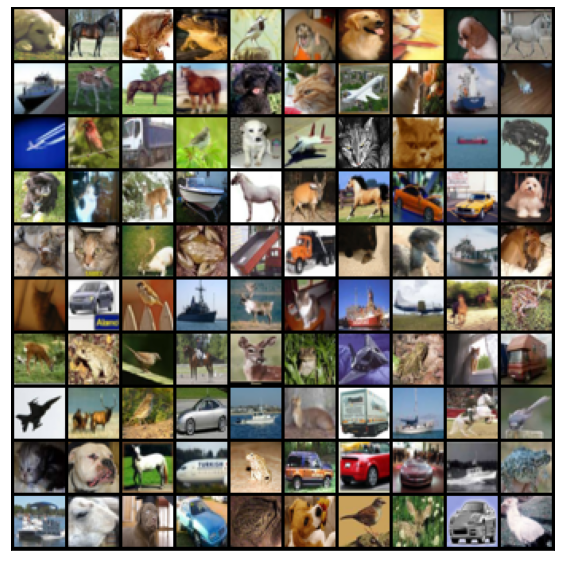

In [75]:
show_batch(train_dl)